In [10]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import pandas as pd

import sys
sys.path.append('..')
from utils import plot_counts_and_proportion, read_train_transaction, get_categorical_from_df

In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


def get_trues(Ser):
    return Ser[Ser].index

def encode_object_cols(X, object_cols):
    les = []
    for col in object_cols:
        # Enconde variables
        le = LabelEncoder()
        notnull = X.loc[:, col].notnull()
        X.loc[notnull, col] = le.fit_transform(X.loc[notnull, col])
        les.append(le)
        
        # Change type
        X[col].fillna(value=-1)
        # TODO corregir el tipo a Int
        X[col] = X[col].astype('float')
        X.loc[X[col] == -1, col] = np.NaN
    return X, les

In [3]:
X, y = read_train_transaction(nrows=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
import copy
X_prueba = copy.deepcopy(X_train)

X_prueba, les = encode_object_cols(X_prueba, get_trues(X_train.dtypes == 'O'))
X_prueba[get_trues(X_train.dtypes == 'O')].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
TransactionID,,,,,,,,,,,,,,
2991154,4.0,3.0,1.0,1.0,NaN,0.0,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0
2991820,4.0,3.0,0.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2988202,4.0,2.0,1.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2990759,0.0,3.0,0.0,16.0,8.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2987622,4.0,3.0,1.0,14.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN


In [5]:
X_train[get_trues(X_train.dtypes == 'O')].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
TransactionID,,,,,,,,,,,,,,
2991154,W,visa,debit,aol.com,NaN,T,T,T,NaN,NaN,F,T,T,T
2991820,W,visa,credit,yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN
2988202,W,mastercard,debit,mail.com,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN
2990759,C,visa,credit,hotmail.com,hotmail.com,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
2987622,W,visa,debit,gmail.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN


In [ ]:
X_train, les_train = encode_object_cols(X_train, get_trues(X_train.dtypes == 'O'))
X_test, les_test = encode_object_cols(X_test, get_trues(X_test.dtypes == 'O'))

In [11]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

#basic parameter:
parameters = {
    'application': 'binary',
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'boosting_type': 'gbdt',
    'boosting': 'gbdt',
    # 'categorical_feature': get_categorical_from_df(X_train)[0],
    'learning_rate': 0.05,
    'metric': 'auc',
    'min_data': 50,
    'max_depth': 10,
    'is_unbalance': 'true',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'objective': 'binary',
    'sub_feature': .5,
    'verbose': 0
}

In [12]:
clf = lgb.train(parameters,
               train_data,
               valid_sets=test_data,
               num_boost_round=5000,
               early_stopping_rounds=1000)

# clf = lgb.train(parameters, train_data, 100)

#Prediction
y_pred = clf.predict(X_test)

[1]	valid_0's auc: 0.674863
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.669658
[3]	valid_0's auc: 0.651462
[4]	valid_0's auc: 0.65097
[5]	valid_0's auc: 0.650205
[6]	valid_0's auc: 0.648607
[7]	valid_0's auc: 0.652883
[8]	valid_0's auc: 0.646366
[9]	valid_0's auc: 0.638607
[10]	valid_0's auc: 0.632117
[11]	valid_0's auc: 0.627213
[12]	valid_0's auc: 0.626721
[13]	valid_0's auc: 0.62582
[14]	valid_0's auc: 0.623839
[15]	valid_0's auc: 0.621161
[16]	valid_0's auc: 0.615642
[17]	valid_0's auc: 0.615997
[18]	valid_0's auc: 0.616503
[19]	valid_0's auc: 0.614836
[20]	valid_0's auc: 0.610902
[21]	valid_0's auc: 0.762459
[22]	valid_0's auc: 0.765779
[23]	valid_0's auc: 0.769754
[24]	valid_0's auc: 0.773702
[25]	valid_0's auc: 0.772322
[26]	valid_0's auc: 0.774372
[27]	valid_0's auc: 0.774863
[28]	valid_0's auc: 0.780191
[29]	valid_0's auc: 0.78612
[30]	valid_0's auc: 0.790546
[31]	valid_0's auc: 0.79123
[32]	valid_0's auc: 0.794317
[33]	valid_0's auc: 0.7

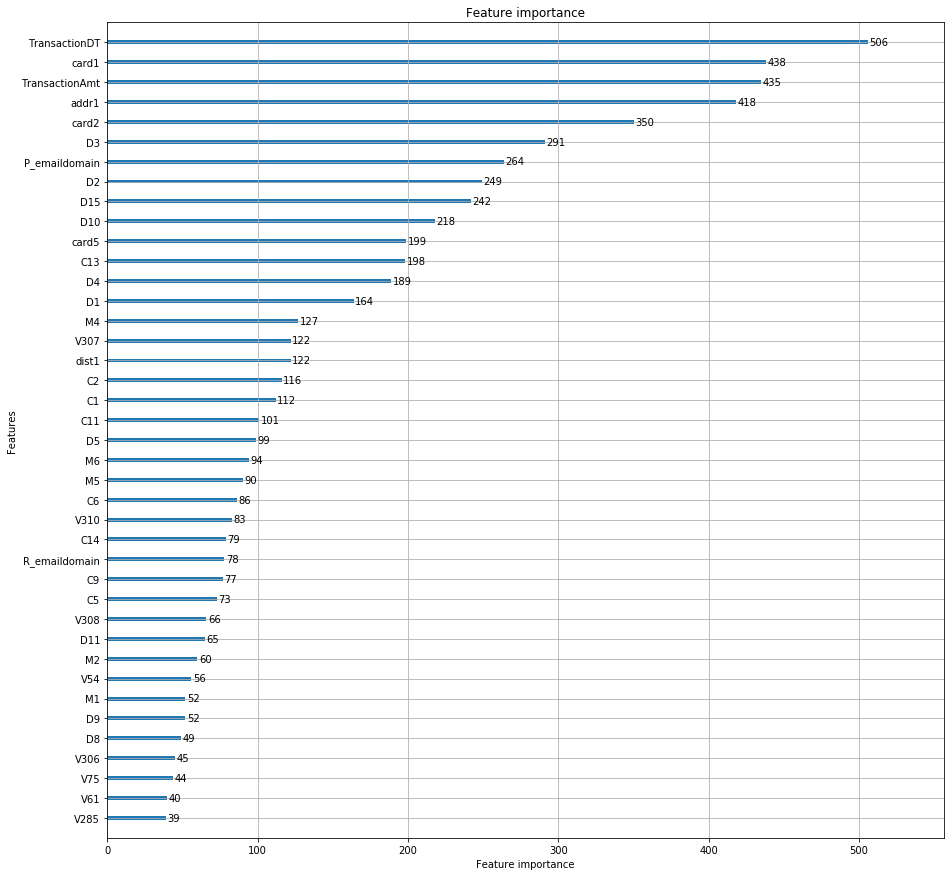

In [17]:
ax = lgb.plot_importance(clf, max_num_features=40, figsize=(15,15))
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
y_pred_bin = y_pred > .5
cm = confusion_matrix(y_test, y_pred_bin)

In [20]:
cm

array([[1220,    0],
       [  22,    8]])